# Task1

C:\Users\Haier\AppData\Local\Temp\ipykernel_4072\1152005782.py:8: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  loangrant_df = pd.read_csv("loangrant.csv")


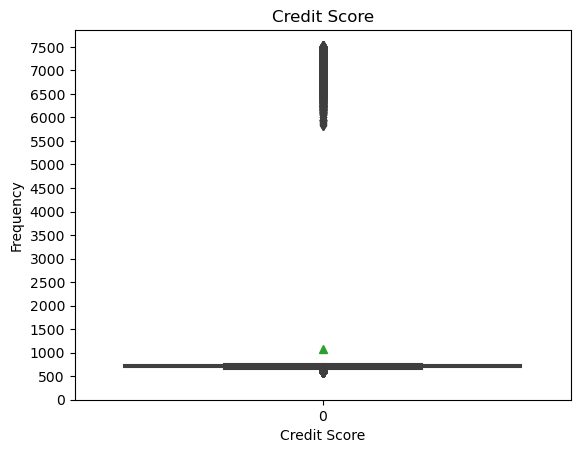

In [7]:

# Outlier detection 
Q1 = loangrant_df['Credit Score'].quantile(0.25)
Q3 = loangrant_df['Credit Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = loangrant_df[(loangrant_df['Credit Score'] < lower_bound) | (loangrant_df['Credit Score'] > upper_bound)]
print("Outliers:")
print(outliers['Credit Score'])

Outliers:
0         7280.0
1         7330.0
2         7240.0
3         7400.0
4         6860.0
           ...  
111040     602.0
111052     644.0
111077     644.0
111097     635.0
111105     626.0
Name: Credit Score, Length: 7886, dtype: float64


# Task2 + Task3

In [8]:
# Handling missing values
# Replace missing values with appropriate central tendency
for column in loangrant_df.columns:
    if loangrant_df[column].dtype != 'object':
        if loangrant_df[column].isnull().sum() > 0:
            mean_val = loangrant_df[column].mean()
            median_val = loangrant_df[column].median()
            mode_val = loangrant_df[column].mode()[0]
            print(f"Column: {column}")
            print(f"Mean: {mean_val}, Median: {median_val}, Mode: {mode_val}")
            print("Replace missing values with median (justification: less sensitive to outliers)")
            # Replace missing values with median (justification: less sensitive to outliers)
            loangrant_df[column].fillna(median_val, inplace=True)

# Verify if there are any missing values left
print("Missing values after replacement:")
print(loangrant_df.isnull().sum())



Column: Credit Score
Mean: 1075.7950294645145, Median: 724.0, Mode: 747.0
Replace missing values with median (justification: less sensitive to outliers)
Column: Annual Income
Mean: 72485.9981842284, Median: 61752.0, Mode: 61188.0
Replace missing values with median (justification: less sensitive to outliers)
Column: Months since last delinquent
Mean: 34.90227237832028, Median: 32.0, Mode: 12.0
Replace missing values with median (justification: less sensitive to outliers)
Column: Bankruptcies
Mean: 0.11765979130403413, Median: 0.0, Mode: 0.0
Replace missing values with median (justification: less sensitive to outliers)
Column: Tax Liens
Mean: 0.02935299200691294, Median: 0.0, Mode: 0.0
Replace missing values with median (justification: less sensitive to outliers)
Missing values after replacement:
Loan ID                            0
Customer ID                        0
Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Sc

# Task4

In [9]:




# Define the mapping for replacement
replacement_mapping = {
    '< 1 year': '< year',
    'n/a': '< year',
    '10+ years': 'above 10 years',
    '1 years': 'two-four years',
    '2 years': 'two-four years',
    '3 years': 'two-four years',
    '4 years': 'two-four years',
    '5 years': 'five-seven years',
    '6 years': 'five-seven years',
    '7 years': 'five-seven years',
    '8 years': 'eight-nine years',
    '9 years': 'eight-nine years',
  
}

# Replace values in the 'Year in current job' column
loangrant_df['Years in current job'] = loangrant_df['Years in current job'].replace(replacement_mapping)

# Save the modified DataFrame to a new CSV file
loangrant_df.to_csv("updated_loangrant.csv", index=False)

print("Modified dataset saved to 'updated_loangrant.csv'")


Modified dataset saved to 'updated_loangrant.csv'
